<a href="https://colab.research.google.com/github/kongenikhil/Kaggle_DataSet_Files/blob/master/Titanic_dataset_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setting the data 
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c titanic

In [ ]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data


In [63]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data_test = pd.read_csv('/content/test.csv')
print(titanic_data.info())
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

# Cleaning the Data set 

## There are 4 types in cleaning 

1. Correcting
2. Completing 
3. Creating ( feature engineering ) 
4. Converting ( formatting ) 

In [64]:
# Checking for any abnormal values 
titanic_data_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [65]:
titanic_data.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

## No abnoraml values found moving to Completeing i.e checking for null values 

In [66]:
# Train value imputing 
print(titanic_data.isna().sum())
total_values = titanic_data.shape[0]
# checking % of missing values 
age = titanic_data['Age'].isna().sum()/total_values * 100
Cabin = titanic_data['Cabin'].isna().sum()/total_values * 100 
print('Missing values in Age is {}'.format(age))
print('Missing values in Cabin is {}'.format(Cabin))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in Age is 19.865319865319865
Missing values in Cabin is 77.10437710437711


 Cabin column has  77% null value's  , Hence we drop it 
 In Age column we impute the median , 
 In Embark columns since only two are missing we can easily replace them by mode 

In [67]:
# Also along with Cabin , Ticket and passenger id are useless for analysis hence we drop them 
drop_columns = ['Cabin','PassengerId','Ticket'       ] 
titanic_data = titanic_data.drop(columns=drop_columns)
titanic_data_test = titanic_data_test.drop(columns=drop_columns)

In [68]:
# Filling Missing values 
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True,)
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(mode_embarked,inplace=True)

In [69]:
# checking for any missing values 
titanic_data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Cleaning the test data set 

In [72]:
titanic_data_test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [73]:
titanic_data_test['Age'].fillna(titanic_data_test['Age'].median(),inplace=True)
titanic_data_test['Fare'].fillna(titanic_data_test['Fare'].mode(),inplace=True)

In [74]:
titanic_data_test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

## Feature Engineering 


In [75]:
titanic_data.head()

Survived  Pclass  ...     Fare Embarked
0         0       3  ...   7.2500        S
1         1       1  ...  71.2833        C
2         1       3  ...   7.9250        S
3         1       1  ...  53.1000        S
4         0       3  ...   8.0500        S

[5 rows x 9 columns]

In [78]:
# Family size can be extracted from sibsp ( siblings or spouse ) and Parch( parents and children ) columns 
titanic_data['Family_size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [96]:
titanic_data_fe = titanic_data.copy(deep=True) # making a copy as i can revert here in case of an error 

0    8.05
dtype: float64

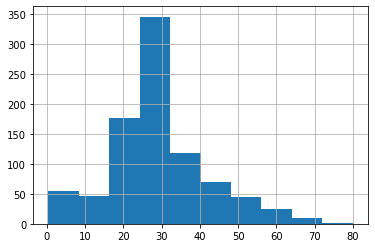

In [97]:

titanic_data_fe['Age'].hist() 
plt.plot()
titanic_data_fe['Fare'].mode()

In [99]:
# performing Binning on Age and Fare as they are continous , skewed distribution variables 
titanic_data_fe['AgeBin'] = pd.cut(titanic_data_fe['Age'].astype(int), 5)

In [100]:
titanic_data_fe['AgeBin']

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBin, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]